In [21]:
# import json
# data = dict()
# over_all = list()
# review_text = list()
# with open('dataset.json') as f:
#     for index, line in enumerate(f):
#         line = json.loads(line)
#         if line.get('overall') and line.get('reviewText') and index<80000:
#             over_all.append(line['overall'])
#             review_text.append(line['reviewText'])
        
# data.update({'overall': over_all, 'reviewText': review_text})
# json_file = open('magazine_dataset.json', 'w')
# json_file.write(json.dumps(data))
# json_file.close()

In [7]:
import os
os.getcwd()

'/Users/chaitanya/Downloads'

In [8]:
import pandas as pd
df = pd.read_json('magazine_dataset.json')

In [9]:
df

,overall,reviewText
0,5,"for computer enthusiast, MaxPC is a welcome si..."
1,5,Thank god this is not a Ziff Davis publication...
2,3,Antiques Magazine is a publication made for an...
3,5,This beautiful magazine is in itself a work of...
4,5,A great read every issue.
...,...,...
95,4,I've subscribed for years. The gold box price ...
96,5,Love the magazine. The price through Amazon i...
97,5,"If you into gaming, into the latest PC tech in..."
98,1,You'll receive a notice an auto-renew notice 9...


In [10]:
# try to remove punctuations , stops words , lower the text, remove numbers, 
#special characters, trailing spaces from reviewText column

In [11]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_json('magazine_dataset.json')

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Remove trailing spaces
    tokens = [word.strip() for word in tokens]
    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Clean the reviewText column
df['reviewText'] = df['reviewText'].apply(clean_text)

# Print the cleaned dataset
print(df.head())


[nltk_data] Downloading package punkt to /Users/chaitanya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chaitanya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaitanya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   overall                                         reviewText
0        5  computer enthusiast maxpc welcome sight mailbo...
1        5  thank god ziff davis publication maxpc actuall...
2        3  antique magazine publication made antique love...
3        5  beautiful magazine work art quality every page...
4        5                             great read every issue


In [12]:
df.head(5)

,overall,reviewText
0,5,computer enthusiast maxpc welcome sight mailbo...
1,5,thank god ziff davis publication maxpc actuall...
2,3,antique magazine publication made antique love...
3,5,beautiful magazine work art quality every page...
4,5,great read every issue


In [13]:
# identifying unique vocabulary

In [14]:
vocabulary = list()
for sentence in df['reviewText']:
    vocabulary.extend(sentence.split(' '))

In [15]:
print(len(vocabulary))

4066


In [97]:
# excluding words/tokens which have frequency less than 10
from collections import Counter
vocabulary_frequency = Counter(vocabulary)
new_vocaabulary = [token for token in set(vocabulary) if vocabulary_frequency[token] > 2]

In [98]:
print(len(new_vocaabulary))

351


In [99]:
new_vocaabulary[:15]

['ended',
 'subscribe',
 'buy',
 'performance',
 'art',
 'interested',
 'point',
 'number',
 'helpful',
 'since',
 'nothing',
 'advertisement',
 'today',
 'cancel',
 'humor']

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

# lets order the vocabulary in alphabetical order
new_vocaabulary = sorted(new_vocaabulary) # these are our features

vectorizer = CountVectorizer(vocabulary=new_vocaabulary)
bag_of_words = vectorizer.fit_transform([reviews for reviews in df['reviewText']])

# Print the bag of words
bag_of_words = bag_of_words.toarray()
bag_of_words

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
LR = LogisticRegression()

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['overall'],
                                                    test_size=0.3, random_state=42, stratify= df['overall'])

In [105]:
LR.fit(X_train, y_train)

LogisticRegression()

In [106]:
LR.score(X_test, y_test)

0.6666666666666666

In [107]:
from sklearn.model_selection import KFold, cross_val_score

In [108]:
# Define the number of folds for cross validation
k = 5

In [109]:
# Create a k-fold cross validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [110]:
# Train and evaluate the model using k-fold cross validation
scores = cross_val_score(LR, bag_of_words, df['overall'], cv=kf)

In [111]:
from sklearn.metrics import f1_score

In [112]:
y_pred = LR.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

In [113]:
print("F1 Score:", f1)

F1 Score: 0.5333333333333333


In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

/Users/chaitanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


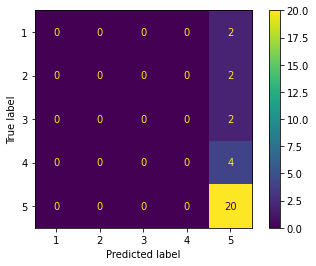

In [115]:
plot_confusion_matrix(LR, X_test, y_test)
plt.show()

In [116]:
plt.show()

In [117]:
# Print the cross validation scores
print('Cross validation scores:', scores)

Cross validation scores: [0.7  0.65 0.65 0.7  0.55]


In [118]:
print('Mean score:', scores.mean())

Mean score: 0.65


In [119]:
print('Standard deviation:', scores.std())

Standard deviation: 0.05477225575051658


In [120]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# Naive Bayes model
NB = MultinomialNB()

In [122]:
NB.fit(X_train, y_train)

MultinomialNB()

In [123]:
y_pred = NB.predict(X_test)

In [124]:
print("Accuracy:", NB.score(X_test, y_test))

Accuracy: 0.6


In [125]:
cm = confusion_matrix(y_test, y_pred)

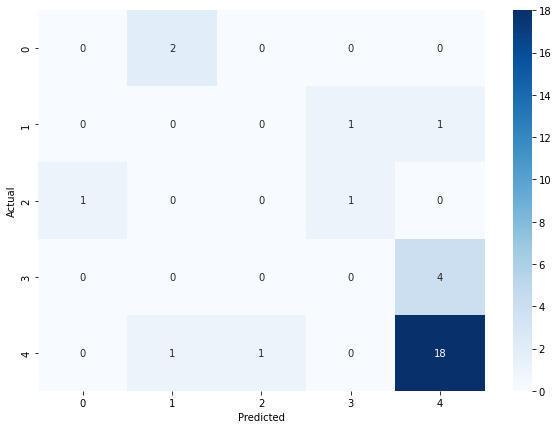

In [126]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [127]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [128]:
n_splits = 5

In [129]:
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [130]:
accuracy_scores = []

In [131]:
for fold, (train_index, test_index) in enumerate(kf.split(bag_of_words)):
    
    # Print the current fold
    print("Fold:", fold+1)
    
    # Get the training and test data for this fold
    X_train, X_test = bag_of_words[train_index], bag_of_words[test_index]
    y_train, y_test = df['overall'][train_index], df['overall'][test_index]
    
    # Initialize Naive Bayes model
    NB = MultinomialNB()

    # Fit the model on the training data
    NB.fit(X_train, y_train)

    # Predict the classes on test data
    y_pred = NB.predict(X_test)

    # Compute accuracy score and append to list
    accuracy_scores.append(accuracy_score(y_test, y_pred))

    # Print the accuracy score for this fold
    print("Accuracy:", accuracy_scores[-1])

Fold: 1
Accuracy: 0.65
Fold: 2
Accuracy: 0.6
Fold: 3
Accuracy: 0.65
Fold: 4
Accuracy: 0.65
Fold: 5
Accuracy: 0.5


In [132]:
print("Average Accuracy:", sum(accuracy_scores)/n_splits)

Average Accuracy: 0.61


In [133]:
f1score = f1_score(y_test, y_pred, average='macro')

In [134]:
print('F1 Score:', f1score)

F1 Score: 0.22400000000000003
